# Predictive Modeling for Customer Churn

### Import Libraries

In [75]:
pip install pandas numpy scikit-learn matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the data
- Explore the data

In [77]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [78]:
df.shape

(7043, 21)

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Preprocessing
- Handle missing values

In [82]:
df['TotalCharges']=df['TotalCharges'].str.replace('.',"")
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtypes)

float64


In [83]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [84]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [85]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [86]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Handling Outliers

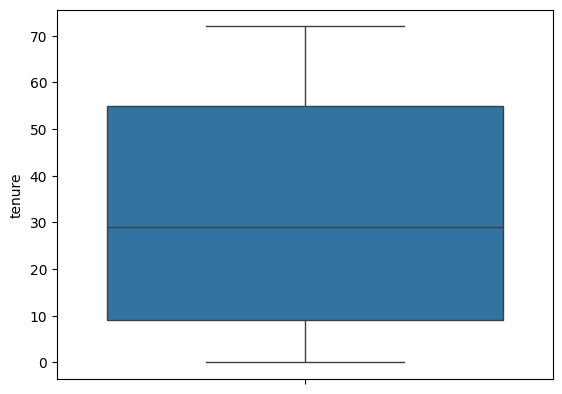

In [ ]:
sns.boxplot(df['tenure'])
plt.show()

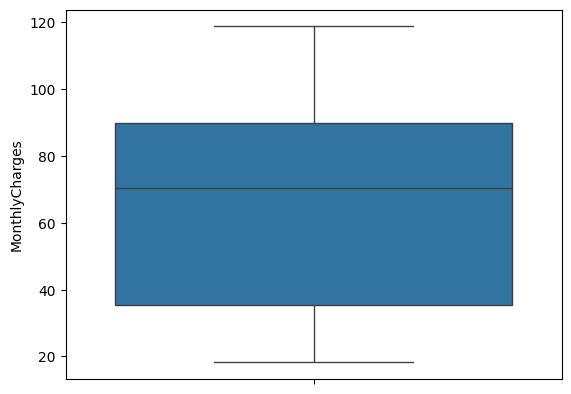

In [88]:
sns.boxplot(df['MonthlyCharges'])
plt.show()

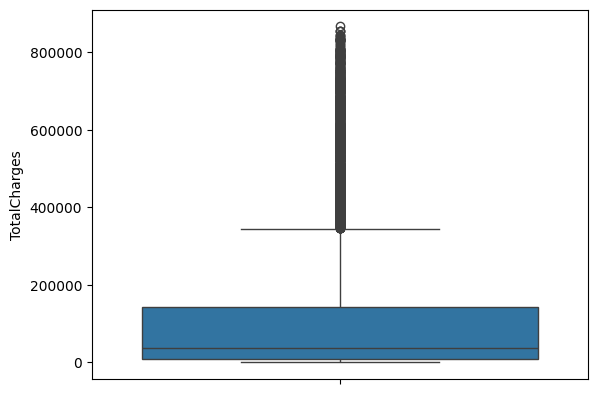

In [89]:
sns.boxplot(df['TotalCharges'])
plt.show()

In [90]:
Q1=df['TotalCharges'].quantile(0.25)
Q3=df['TotalCharges'].quantile(0.75)
IQR= Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5* IQR
df['TotalCharges']=np.where(df['TotalCharges']<lower_bound ,lower_bound,df['TotalCharges'])
df['TotalCharges']=np.where(df['TotalCharges']>upper_bound ,upper_bound,df['TotalCharges'])

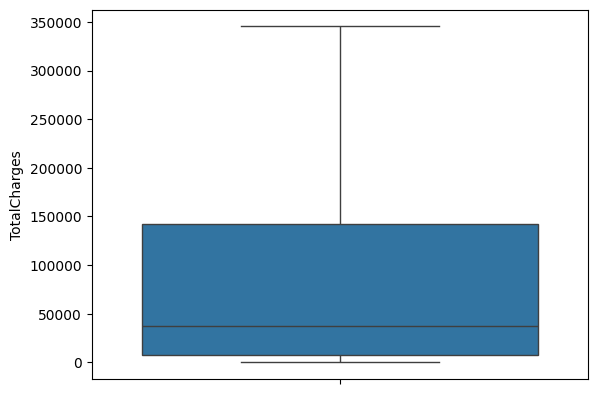

In [91]:
sns.boxplot(df['TotalCharges'])
plt.show()

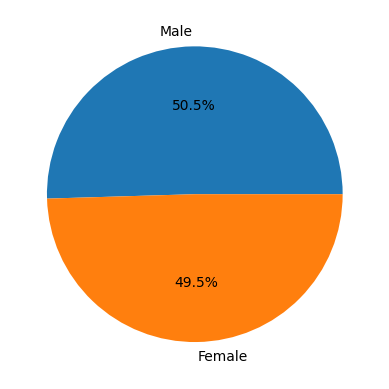

In [92]:
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

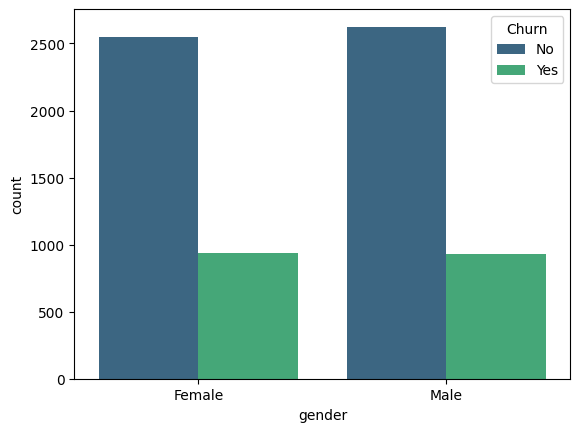

In [93]:
sns.countplot(x='gender',hue='Churn',palette='viridis',data=df)
plt.show()

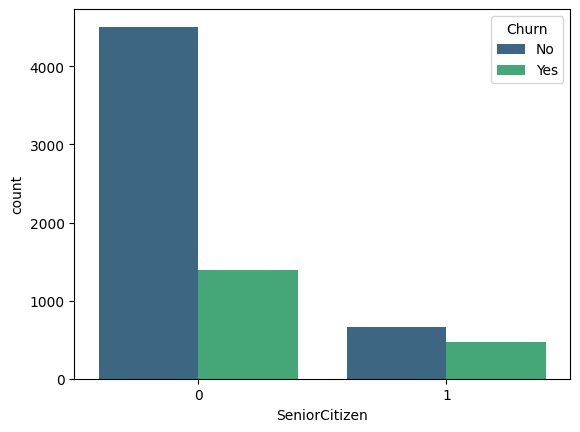

In [94]:
sns.countplot(x='SeniorCitizen',hue='Churn',palette='viridis',data=df)
plt.show()

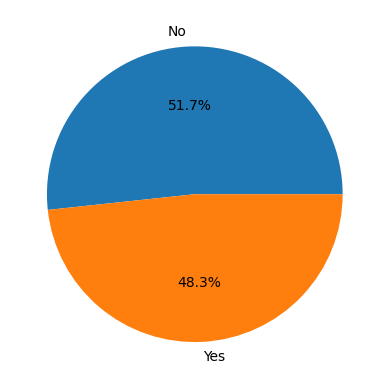

In [95]:
plt.pie(df['Partner'].value_counts(),labels=df['Partner'].value_counts().index,autopct='%1.1f%%')
plt.show()

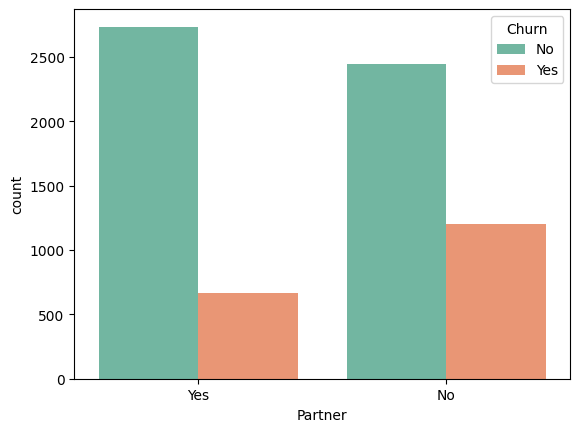

In [96]:
sns.countplot(x='Partner',hue='Churn',palette='Set2',data=df)
plt.show()

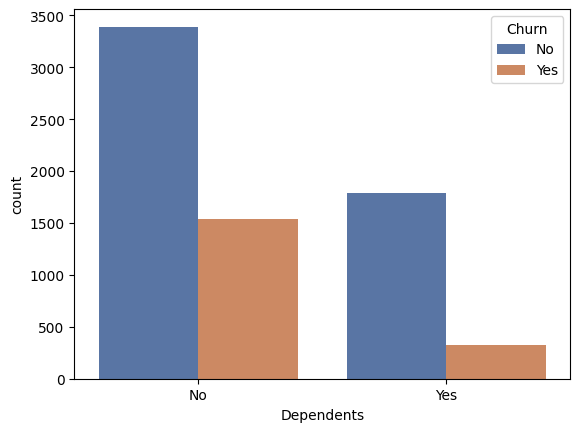

In [97]:
sns.countplot(x='Dependents',hue='Churn',palette='deep',data=df)
plt.show()

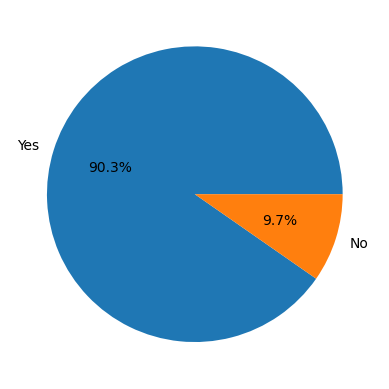

In [98]:
plt.pie(df['PhoneService'].value_counts(),labels=df['PhoneService'].value_counts().index,autopct='%1.1f%%')
plt.show()

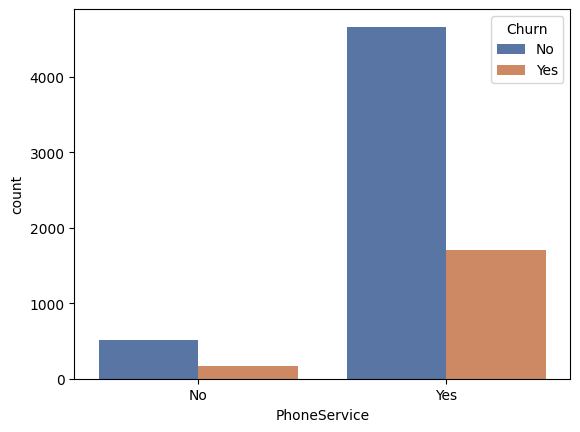

In [99]:
sns.countplot(x='PhoneService',hue='Churn',data=df,palette='deep')
plt.show()

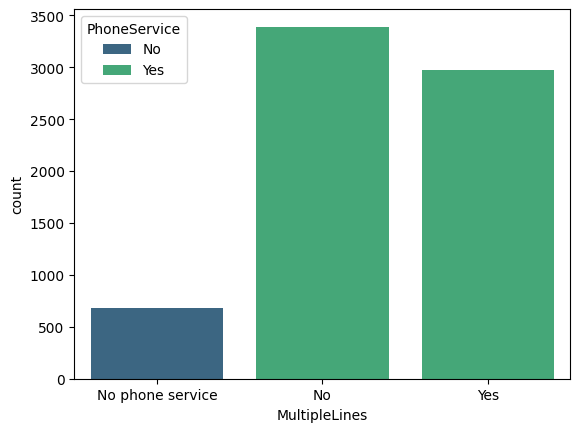

In [100]:
sns.countplot(x='MultipleLines',hue='PhoneService',data=df,palette='viridis')
plt.show()

/var/folders/1l/32pjxxc168qc488f3mcj2_2r0000gn/T/ipykernel_31039/4139011065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['InternetService'].value_counts().index,y=df['InternetService'].value_counts(),palette='Set2')


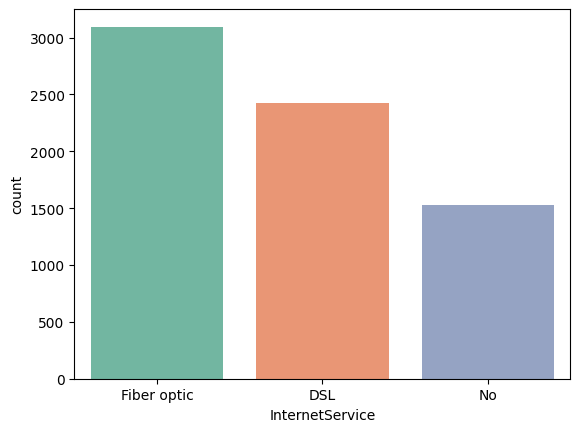

In [101]:
sns.barplot(x=df['InternetService'].value_counts().index,y=df['InternetService'].value_counts(),palette='Set2')
plt.show()

In [102]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

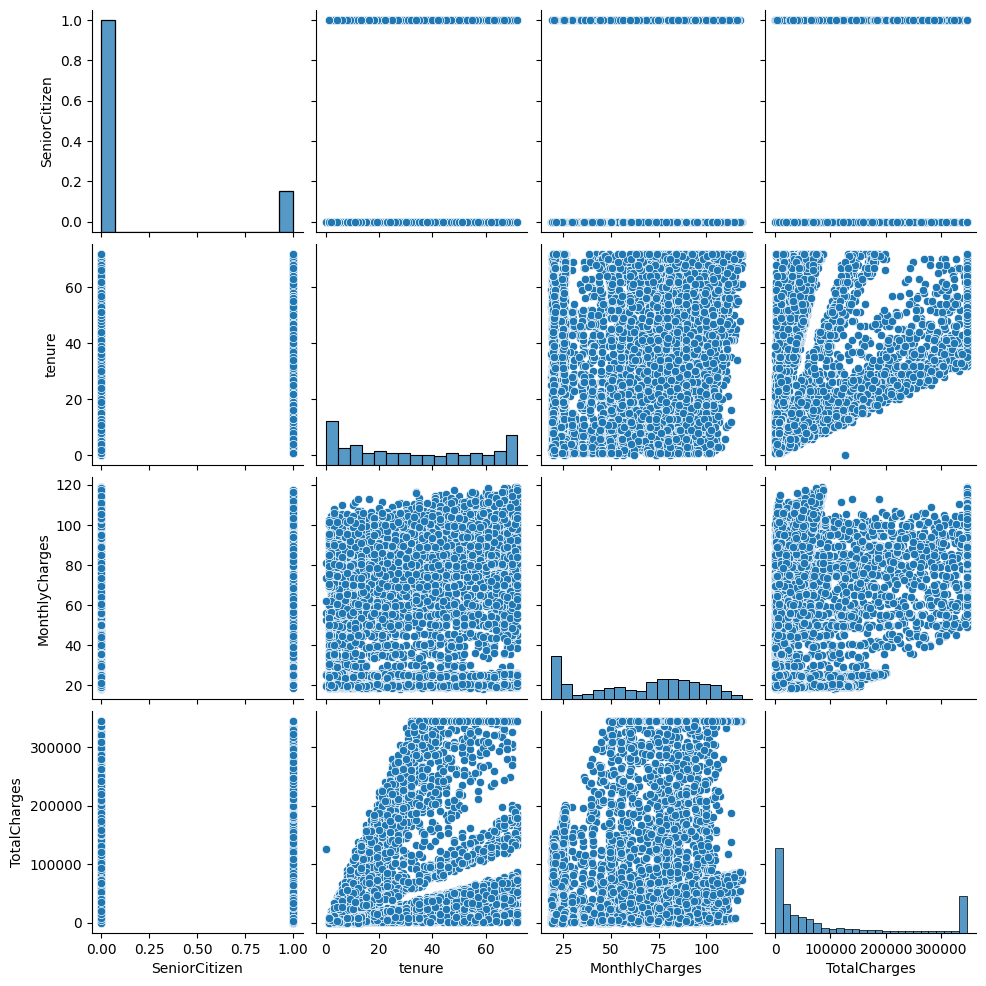

In [103]:
sns.pairplot(df,palette='Set2')
plt.show()

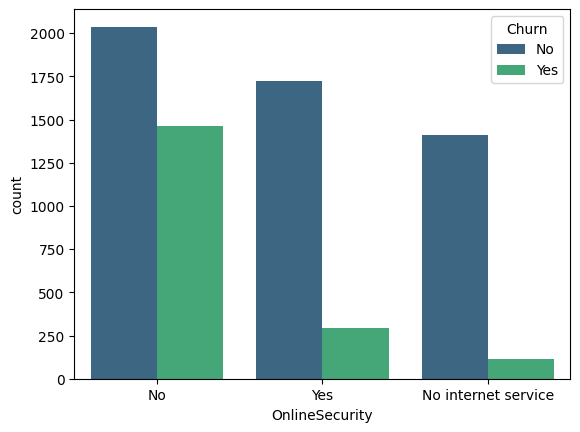

In [104]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df,palette='viridis')
plt.show()

/var/folders/1l/32pjxxc168qc488f3mcj2_2r0000gn/T/ipykernel_31039/2267866539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['PaymentMethod'].value_counts().index,y=df['PaymentMethod'].value_counts(),palette='Set2')


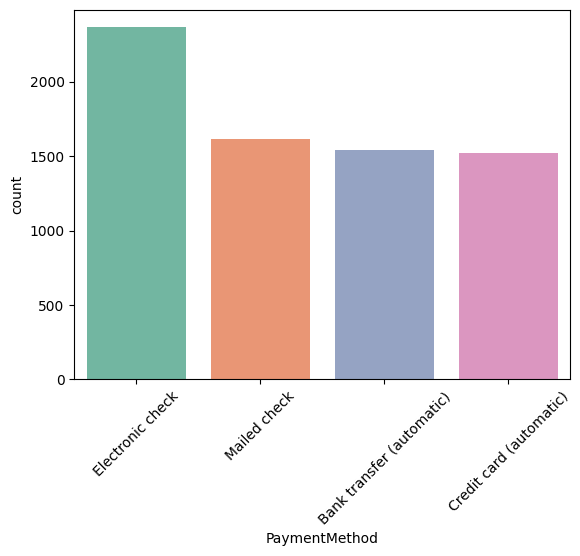

In [105]:
sns.barplot(x=df['PaymentMethod'].value_counts().index,y=df['PaymentMethod'].value_counts(),palette='Set2')
plt.xticks(rotation=45)
plt.show()

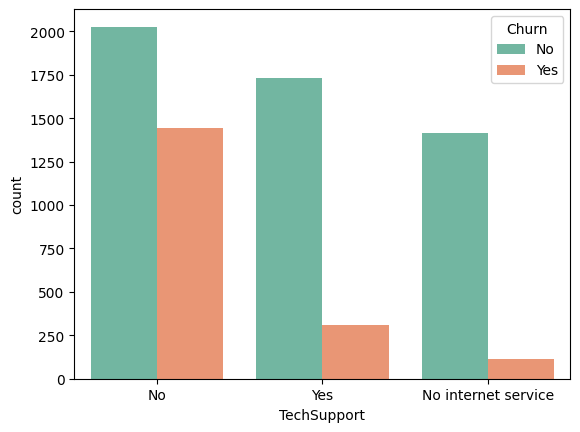

In [106]:
sns.countplot(x='TechSupport',hue='Churn',palette='Set2',data=df)
plt.show()

In [107]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

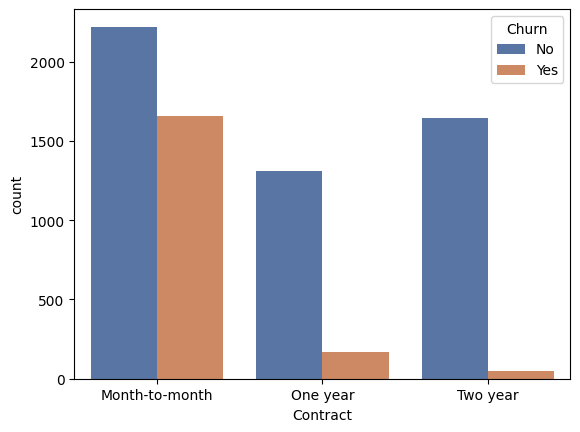

In [108]:
sns.countplot(x='Contract',hue='Churn',palette='deep',data=df)
plt.show()

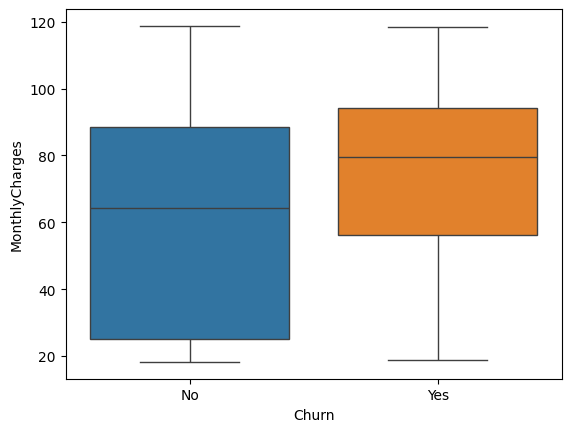

In [109]:
sns.boxplot(x='Churn',y='MonthlyCharges', hue='Churn',data=df)
plt.show()

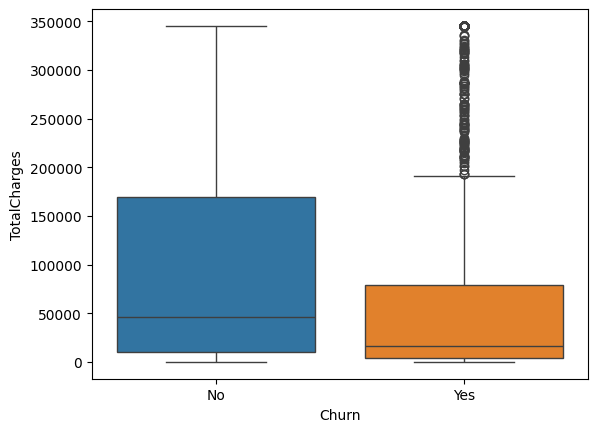

In [110]:
sns.boxplot(x='Churn',y='TotalCharges', hue='Churn', data=df)
plt.show()

<Axes: >

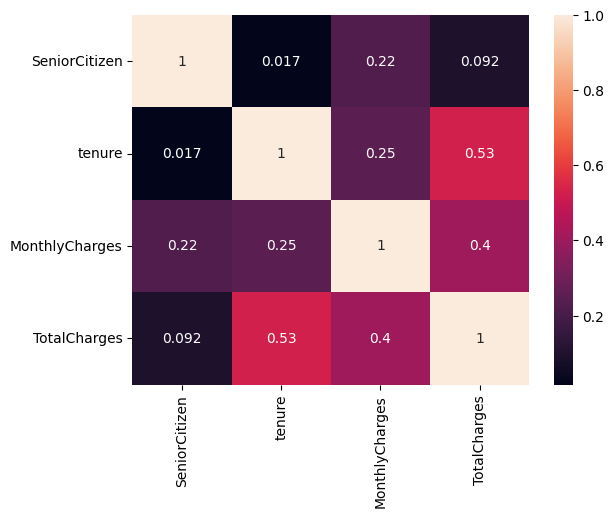

In [111]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

### Feature Engineering
- Data Exploration\Dataset has 7043 rows, 21 columns. Churn is imbalanced.

In [112]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [113]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [114]:
df = df.drop(['customerID'], axis=1)

In [115]:
df['tenure']=pd.qcut(df['tenure'],q=[0,0.25,0.75,1],labels=['short_term_customer','mid_term_customer','long_term_customer'])

In [116]:
df['tenure'].value_counts()

tenure
mid_term_customer      3434
short_term_customer    1854
long_term_customer     1755
Name: count, dtype: int64

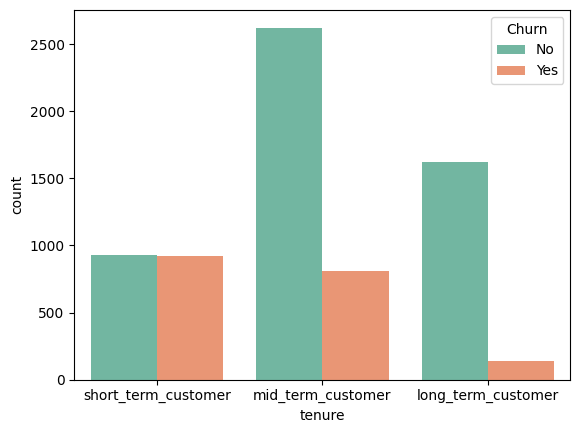

In [117]:
sns.countplot(x='tenure',hue='Churn',data=df,palette='Set2')
plt.show()

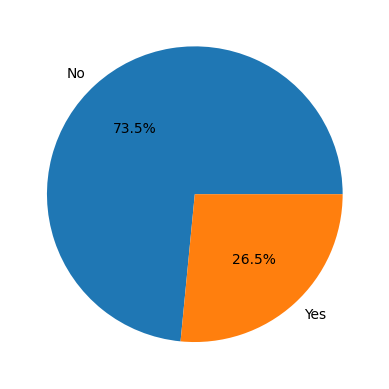

In [118]:
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Encoding the data

In [119]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [120]:
df['gender']=df['gender'].replace({'Male': 0 , 'Female' : 1})

/var/folders/1l/32pjxxc168qc488f3mcj2_2r0000gn/T/ipykernel_31039/1959483337.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'Male': 0 , 'Female' : 1})


In [121]:
df['gender'].value_counts()

gender
0    3555
1    3488
Name: count, dtype: int64

In [122]:
df['Partner']=df['Partner'].replace({'No':0, 'Yes':1})

/var/folders/1l/32pjxxc168qc488f3mcj2_2r0000gn/T/ipykernel_31039/3151138399.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner']=df['Partner'].replace({'No':0, 'Yes':1})


In [123]:
df['Partner'].value_counts()

Partner
0    3641
1    3402
Name: count, dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   category
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

In [125]:
columns=['Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', ]

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
encoder=LabelEncoder()

In [128]:
for col in columns:
    df[col]=encoder.fit_transform(df[col])

In [129]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,2,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2985.0,No
1,0,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,56.95,18895.0,No
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,10815.0,Yes
3,0,0,0,0,1,0,1,0,2,0,2,2,0,0,1,0,0,42.30,184075.0,No
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,15165.0,Yes


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [131]:
x=df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
     'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y=df[['Churn']]

In [132]:
y['Churn']=y['Churn'].replace({'No' : 0 , 'Yes' :1 })

/var/folders/1l/32pjxxc168qc488f3mcj2_2r0000gn/T/ipykernel_31039/2139147190.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Churn']=y['Churn'].replace({'No' : 0 , 'Yes' :1 })
/var/folders/1l/32pjxxc168qc488f3mcj2_2r0000gn/T/ipykernel_31039/2139147190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']=y['Churn'].replace({'No' : 0 , 'Yes' :1 })


In [133]:
pip install imblearn -q

Note: you may need to restart the kernel to use updated packages.


Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


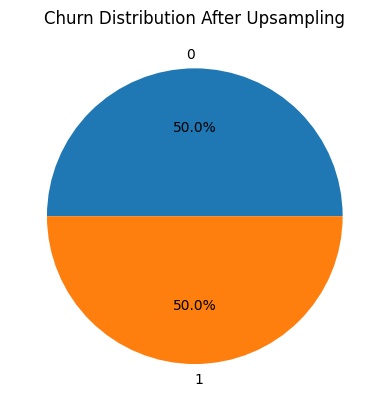

In [134]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(x, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=x.columns)
df_resampled['Churn'] = y_resampled

# Check the class distribution after resampling
print(df_resampled['Churn'].value_counts(normalize=True))

# Plot the distribution of the resampled data
plt.pie(df_resampled['Churn'].value_counts(), labels=df_resampled['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Churn Distribution After Upsampling')
plt.show()

In [135]:
df_resampled.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,2,1,0,0,2,0,0,0,0,1,2,29.85,2985.0,0
1,0,0,0,1,0,0,2,0,2,0,0,1,0,3,56.95,18895.0,0
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,10815.0,1
3,0,0,0,1,1,0,2,0,2,2,0,1,0,0,42.30,184075.0,0
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,15165.0,1


In [136]:
x=df_resampled.drop('Churn',axis=1)
y=df_resampled[['Churn']]

In [137]:
x.shape

(10348, 16)

In [138]:
y.shape

(10348, 1)

In [139]:
y.value_counts()

Churn
0        5174
1        5174
Name: count, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [142]:
x_train.shape

(7450, 16)

In [143]:
y_train.shape

(7450, 1)

In [144]:
x_valid.shape

(828, 16)

In [145]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [146]:
x_train['MonthlyCharges'] = scale.fit_transform(x_train[['MonthlyCharges']])
x_valid['MonthlyCharges'] = scale.transform(x_valid[['MonthlyCharges']])
x_test['MonthlyCharges'] = scale.transform(x_test[['MonthlyCharges']])

In [147]:
x_train['TotalCharges'] = scale.fit_transform(x_train[['TotalCharges']])
x_valid['TotalCharges'] = scale.transform(x_valid[['TotalCharges']])
x_test['TotalCharges'] = scale.transform(x_test[['TotalCharges']])

In [148]:
x_train['MonthlyCharges'].describe()

count    7.450000e+03
mean     1.068198e-16
std      1.000067e+00
min     -1.720926e+00
25%     -7.810134e-01
50%      2.370809e-01
75%      7.930369e-01
max      1.771172e+00
Name: MonthlyCharges, dtype: float64

In [149]:
x_train['TotalCharges'].describe()

count    7.450000e+03
mean     3.385808e-17
std      1.000067e+00
min     -7.498038e-01
25%     -6.986569e-01
50%     -5.055486e-01
75%      2.806827e-01
max      2.143776e+00
Name: TotalCharges, dtype: float64

### Model

In [150]:
pip install xgboost -q

Note: you may need to restart the kernel to use updated packages.


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

In [152]:
LR=LogisticRegression(max_iter=1000,C =0.02)

In [153]:
LR.fit(x_train,y_train)
y_pred1=LR.predict(x_valid)
accuracy=accuracy_score(y_valid,y_pred1)
precision = precision_score(y_valid, y_pred1, average='weighted')
recall = recall_score(y_valid, y_pred1, average='weighted')
f1 = f1_score(y_valid, y_pred1, average='weighted')
print(f"accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.73


/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
SVR=SVC(C=1,kernel='rbf')
SVR.fit(x_train,y_train)
y_pred2=SVR.predict(x_valid)
accuracy=accuracy_score(y_valid,y_pred2)
precision = precision_score(y_valid, y_pred2, average='weighted')
recall = recall_score(y_valid, y_pred2, average='weighted')
f1 = f1_score(y_valid, y_pred2, average='weighted')
print(f"accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


In [155]:
DT=DecisionTreeClassifier(max_depth=5,min_samples_split=5)
DT.fit(x_train,y_train)
y_pred3=DT.predict(x_valid)
accuracy=accuracy_score(y_valid,y_pred3)
precision = precision_score(y_valid, y_pred3, average='weighted')
recall = recall_score(y_valid, y_pred3, average='weighted')
f1 = f1_score(y_valid, y_pred3, average='weighted')
print(f"accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

accuracy: 0.73
Precision: 0.74
Recall: 0.73
F1 Score: 0.73


In [156]:
KNN =KNeighborsClassifier(n_neighbors=10,weights='distance')
KNN.fit(x_train,y_train)
y_pred4=KNN.predict(x_valid)
accuracy=accuracy_score(y_valid,y_pred4)
precision = precision_score(y_valid, y_pred4, average='weighted')
recall = recall_score(y_valid, y_pred4, average='weighted')
f1 = f1_score(y_valid, y_pred4, average='weighted')
print(f"accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

accuracy: 0.81
Precision: 0.84
Recall: 0.81
F1 Score: 0.80


/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [157]:
Xgboost=XGBClassifier(n_estimators = 500,
    max_depth =5,
    learning_rate = 0.02,
    subsample=0.6) 
Xgboost.fit(x_train,y_train)
y_pred5=Xgboost.predict(x_valid)
accuracy=accuracy_score(y_valid,y_pred5)
precision = precision_score(y_valid, y_pred5, average='weighted')
recall = recall_score(y_valid, y_pred5, average='weighted')
f1 = f1_score(y_valid, y_pred5, average='weighted')
print(f"accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


### Feature Importances

In [158]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
importances=model.feature_importances_

/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [159]:
FI=pd.DataFrame({'feature': x_train.columns, 'importances':importances})
FI

,feature,importances
0,SeniorCitizen,0.021360
1,Partner,0.026673
2,Dependents,0.022139
3,tenure,0.060354
4,MultipleLines,0.026295
5,InternetService,0.028932
6,OnlineSecurity,0.056762
7,OnlineBackup,0.030094
8,DeviceProtection,0.027280
9,TechSupport,0.054879


### Hyperparameters tuning

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
xgb_params = {
    'n_estimators': [500],
    'max_depth': [ 5, 7],
    'learning_rate': [0.01, 0.02, 0.1],
    'subsample': [0.6, 0.8],
    'gamma': [0.1, 0.3, 0.5],
    'colsample_bytree': [0.5, 0.7]
}
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), xgb_params, cv=5, scoring='accuracy')
xgb_grid_search.fit(x_train, y_train)

/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:17:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:17:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jakemammen/Library/CloudStorage/OneDrive-Personal/Desktop/customer_churn_prediction/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:17:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jakemammen/Library/CloudStorag

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'gamma': [0.1, 0.3, 0.5],
                         'learning_rate': [0.01, 0.02, 0.1],
                         'max_depth': [5, 7], 'n_estimators': [500],
                         'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [162]:
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)

Best parameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}


In [163]:
xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_best_model.predict(x_valid)

In [164]:
xgb_accuracy = accuracy_score(y_valid, xgb_pred)
print(f"accuracy: {xgb_accuracy:.2f}")

accuracy: 0.85


In [165]:
x_test=x_test[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure','MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
     'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [166]:
xgb_pred_test = xgb_best_model.predict(x_test)

In [167]:
test_accuracy = accuracy_score(y_test, xgb_pred_test)
print(f"XGBoost Test Accuracy: {test_accuracy:.2f}")

XGBoost Test Accuracy: 0.87


Precision: 0.87
Recall: 0.87
F1 Score: 0.87


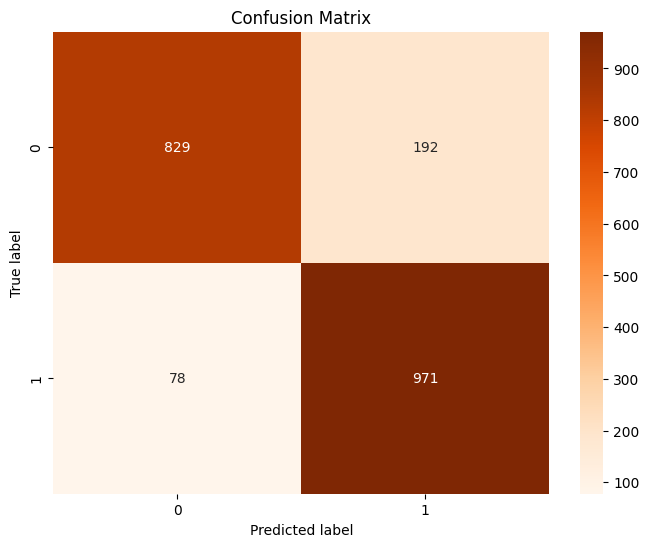

In [168]:
precision = precision_score(y_test,xgb_pred_test , average='weighted')
recall = recall_score(y_test,xgb_pred_test, average='weighted')
f1 = f1_score(y_test, xgb_pred_test, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
cm = confusion_matrix(y_test, xgb_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [169]:
from sklearn.metrics import classification_report
report = classification_report(y_test,xgb_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1021
           1       0.83      0.93      0.88      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

